# IBM CAPSTONE PROJECT: Battle of Neighborhoods


## INTRODUCTION

Toronto, the capital of Ontario province is the most populous city in Canada and the 4th most in entire North America with a population of 2.9 million in 2017. Toronto is an international centre of business, finance, arts, and culture, and is recognized as one of the most multicultural and cosmopolitan cities in the world, attracting tourists as well as immigrants from various different parts of the world. Of the 2011 population, a whopping 49% of people living in Toronto are immigrants (higher than the Canada-wide 29%) of which the Indian community accounts for 6.3% of the total population. Having a considerable amount of Indian population in Toronto means a good chunk of people will be practicing Indian culture and customs in Toronto and the ethic food is undoubtedly one of the biggest part of Indian lives. Research paper published by Joel Waldfogel found that Indian cuisine was the 4th most popular in the world hence all these factors indicate no shortage in demand of Indian restaurants in Toronto.
So, in this project we find the best place in Toronto to open a new Indian Restaurant.



## DATA

The data that was used in this project are:

    1)Wikipedia page 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M' to get data containing the postal codes of various regions of Canada.
    
    2)Foursquare API: to get the information about different venues (Indian Restaurants) in Toronto.
    
    3)Beautiful Soap for web page scraping.
    
    4)"https://cocl.us/Geospatial_data": We will get the data of Toronto from here.
    


## MEDTHODOLOGY

### Importing all the neccesary libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import random
import json

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

!conda install -c conda-forge folium=0.5.0 --yes
import folium

import requests # library to handle requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [3]:
# We now import web scraping library called Beautiful Soap
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup
# librabry to request html
import requests


     |████████████████████████████████| 122kB 6.9MB/s eta 0:00:01
     |████████████████████████████████| 5.5MB 6.5MB/s eta 0:00:01


### Here we use beautiful soap to get gata from the Wikipedia page

In [4]:
# request html link
source=requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup= BeautifulSoup(source,'lxml')
print(soup.title)

<title>List of postal codes of Canada: M - Wikipedia</title>


In [5]:
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html

In [6]:
tab = str(soup.table)
display_html(tab,raw=True)

Postal Code,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Regent Park, Harbourfront"
M6A,North York,"Lawrence Manor, Lawrence Heights"
M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
M8A,Not assigned,Not assigned
M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
M1B,Scarborough,"Malvern, Rouge"


In [7]:
df1=pd.read_html(tab)
df=df1[0]
df

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


We see that there are my 'Not assigned' postal codes so we remove them

In [8]:
df_dropna = df[df.Borough != 'Not assigned'].reset_index(drop=True)

In [9]:
df_dropna.shape

(103, 3)

In [10]:
df_dropna.rename(columns={'Postal Code' : 'PostalCode'}, inplace=True)

In [11]:
df = df_dropna

In [12]:
df.head()

,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


We will group the data based on borough

In [13]:
df_grouped = df.groupby(['Borough', 'PostalCode'], as_index=False).agg(lambda x:','.join(x))
df_grouped.head()

,Borough,PostalCode,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [14]:
df = df_grouped

In [15]:
df = df[['PostalCode', 'Borough', 'Neighbourhood']]
df.head()

,PostalCode,Borough,Neighbourhood
0,M4N,Central Toronto,Lawrence Park
1,M4P,Central Toronto,Davisville North
2,M4R,Central Toronto,"North Toronto West, Lawrence Park"
3,M4S,Central Toronto,Davisville
4,M4T,Central Toronto,"Moore Park, Summerhill East"


Now we are going to create a new table with the Latitudes and Longitudes corresponding to the different PostalCodes

In [16]:
geo_url = "https://cocl.us/Geospatial_data"

geo_df = pd.read_csv(geo_url)
geo_df.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
geo_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merging the two columns containing co-ordinates and names of boroughs and neighborhoods

In [17]:
# Merging the Data
df = pd.merge(df, geo_df, on='PostalCode')
df.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160


### Now we will find all neighborhoods that have the word "Toronto" in it

In [18]:
toronto_df=df[df['Borough'].str.contains('Toronto',regex=False)]
toronto_df

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
2,M4R,Central Toronto,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,M4S,Central Toronto,Davisville,43.704324,-79.388790
4,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
5,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049
6,M5N,Central Toronto,Roselawn,43.711695,-79.416936
7,M5P,Central Toronto,"Forest Hill North & West, Forest Hill Road Park",43.696948,-79.411307
8,M5R,Central Toronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678
9,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529


### Showing these locations on a Toronto Map

In [19]:
toronto_latitude= 43.6532
toronto_longitude= -79.3832

toronto_map= folium.Map(location=[toronto_latitude,toronto_longitude],zoom_start=10)
for p,b,n,la,lo in zip(toronto_df['PostalCode'],toronto_df['Borough'],toronto_df['Neighbourhood'],toronto_df['Latitude'],toronto_df['Longitude']):
    label= '{},{}'.format(n,b)
    label= folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [la,lo],
    radius=5,
    color='blue',
    fill_color='#3186cc',
    fill_opacity=0.7,
    popup=label,
    parse_html = False).add_to(toronto_map)

toronto_map    

### Next we will define foursquare Credentials

In [20]:
CLIENT_ID = '01ZYM0Y1KAWOARIZD55U1KQCSIWX13HT4IVEWUZRVWL0PDPO' # your Foursquare ID
CLIENT_SECRET = 'LBG24V5DZ5VDXUBOU5X3EATQ2LYMS0P3W4HZEBJ4AU5Y5444' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 01ZYM0Y1KAWOARIZD55U1KQCSIWX13HT4IVEWUZRVWL0PDPO
CLIENT_SECRET:LBG24V5DZ5VDXUBOU5X3EATQ2LYMS0P3W4HZEBJ4AU5Y5444


### Now, let's get the top 100 venues within a radius of 500 meters.
First, let's create the GET request URL

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
    
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


Creating a new dataframe containing information of different venues in Torornto

In [22]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighbourhood'],
                                latitudes=toronto_df['Latitude'],
                                longitudes=toronto_df['Longitude'])

In [23]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Lawrence Park,43.728020,-79.388790,Lawrence Park Ravine,43.726963,-79.394382,Park
1,Lawrence Park,43.728020,-79.388790,HYC Design Inc.,43.726793,-79.391681,Business Service
2,Lawrence Park,43.728020,-79.388790,Zodiac Swim School,43.728532,-79.382860,Swim School
3,Lawrence Park,43.728020,-79.388790,TTC Bus #162 - Lawrence-Donway,43.728026,-79.382805,Bus Line
4,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop


### We will do one hot encoding for getting dummies of the venue category.

In [25]:
to_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
to_onehot['Neighbourhoods'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [to_onehot.columns[-1]] + list(to_onehot.columns[:-1])
to_onehot = to_onehot[fixed_columns]

print(to_onehot.shape)
to_onehot.head()

(1630, 237)


,Neighbourhoods,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We group the rows by neighborhood and by taking the mean of the frequency of each category

In [26]:
to_grouped = to_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(to_grouped.shape)
to_grouped.head()

(39, 237)


,Neighbourhoods,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,"Business reply mail Processing Centre, South C...",0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.058824
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.0,0.058824,0.058824,0.058824,0.117647,0.117647,0.117647,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,Central Bay Street,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.015873,0.0,0.0,0.015873,0.0,0.015873


In [27]:
ind = to_grouped[["Neighbourhoods","Indian Restaurant"]]
ind.head()

,Neighbourhoods,Indian Restaurant
0,Berczy Park,0.017241
1,"Brockton, Parkdale Village, Exhibition Place",0.000000
2,"Business reply mail Processing Centre, South C...",0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000
4,Central Bay Street,0.015873


In [28]:
ind=ind.rename(columns={'Neighbourhoods':'Neighborhood'})

### Now we will cluster the neighborhoods
We will use **k-means clustering**. But first we will find the best K using the Elbow Point method.

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=15, random_state=8)
X = ind.drop(['Neighborhood'], axis=1)

In [30]:
kmeans.fit(X)
kmeans.labels_[0:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

In [31]:
def get_k(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(X)
    return km.inertia_

In [32]:
scores = [get_k(x) for x in range(2, 21)]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab

Text(0, 0.5, 'Error')

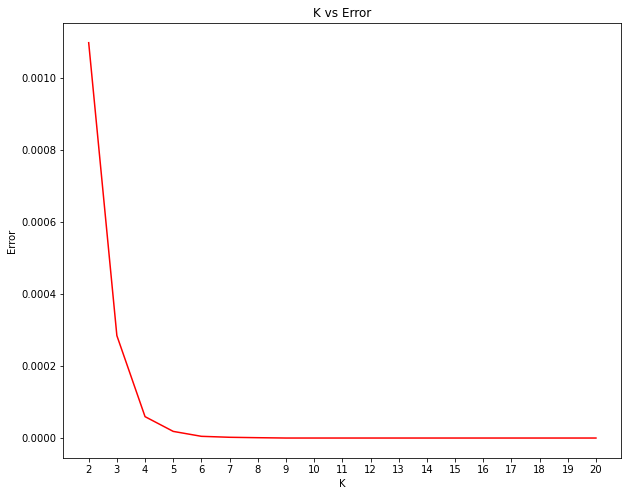

In [33]:
plt.figure(figsize=[10, 8])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")

We see that the optimum **K** value is **4** so we will have a resulting of 4 clusters

In [34]:
kclusters = 4

toronto_grouped_clustering = ind.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 3, 1], dtype=int32)

In [35]:
# a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood
to_merged = ind.copy()
# add clustering labels
to_merged["Cluster Labels"] = kmeans.labels_

In [36]:
to_merged.head()

,Neighborhood,Indian Restaurant,Cluster Labels
0,Berczy Park,0.017241,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,1
2,"Business reply mail Processing Centre, South C...",0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,1
4,Central Bay Street,0.015873,0


We merge the toronto_grouped with toronto_data to add co-ordinates for each neighborhood

In [37]:
to_merged = to_merged.join(toronto_venues.set_index("Neighbourhood"), on="Neighborhood")

print(to_merged.shape)
to_merged.head()

(1630, 9)


,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.017241,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
0,Berczy Park,0.017241,0,43.644771,-79.373306,LCBO,43.642944,-79.372440,Liquor Store
0,Berczy Park,0.017241,0,43.644771,-79.373306,Fresh On Front,43.647815,-79.374453,Vegetarian / Vegan Restaurant
0,Berczy Park,0.017241,0,43.644771,-79.373306,Meridian Hall,43.646292,-79.376022,Concert Hall
0,Berczy Park,0.017241,0,43.644771,-79.373306,Hockey Hall Of Fame (Hockey Hall of Fame),43.646974,-79.377323,Museum


In [38]:
# sort the results by Cluster Labels
print(to_merged.shape)
to_merged.sort_values(["Cluster Labels"], inplace=True)
to_merged

(1630, 9)


,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.017241,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,Carisma,43.649617,-79.375434,Italian Restaurant
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,The Poké Box,43.650469,-79.376317,Poke Place
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,Ki Modern Japanese + Bar,43.647223,-79.379374,Japanese Restaurant
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,CC Lounge,43.647917,-79.374520,Cocktail Bar
...,...,...,...,...,...,...,...,...,...
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Christina's On The Danforth,43.678240,-79.349185,Greek Restaurant
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Demetres,43.677683,-79.351608,Dessert Shop
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Tsaa Tea Shop,43.677769,-79.351304,Bubble Tea Shop
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


In [39]:
to_merged['Venue Category'].value_counts()['Indian Restaurant']

9

So we only have **9 Indian resturants** in Toronto

Showing the clusters on a Toronto Map

In [58]:
# create map
map_clusters = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(to_merged['Neighbourhood Latitude'], to_merged['Neighbourhood Longitude'], to_merged['Neighborhood'], to_merged['Cluster Labels']):
    label= '{},{}'.format(poi,cluster)
    label= folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [41]:
ind["Cluster Labels"] = kmeans.labels_
ind.head()

,Neighborhood,Indian Restaurant,Cluster Labels
0,Berczy Park,0.017241,0
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,1
2,"Business reply mail Processing Centre, South C...",0.000000,1
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,1
4,Central Bay Street,0.015873,0


## RESULTS

### Now we find out how many neighborhoods are their in each cluster

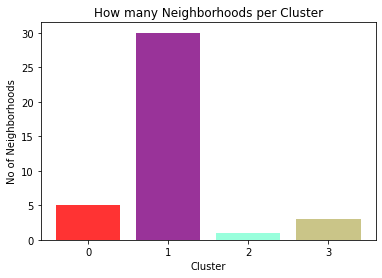

In [59]:
objects = (0,1,2,3)
y_pos = np.arange(len(objects))
performance = ind['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()

We clearly see that **cluster 1 has most no. of neighborhoods in it (30) meanwhile cluster 3 has the least (<5)**

Analysis of each Cluster


Cluster 0 (RED)

In [61]:
cluster0 = to_merged.loc[to_merged['Cluster Labels'] == 0]
cluster0

,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Berczy Park,0.017241,0,43.644771,-79.373306,The Keg Steakhouse + Bar - Esplanade,43.646712,-79.374768,Restaurant
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,Carisma,43.649617,-79.375434,Italian Restaurant
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,The Poké Box,43.650469,-79.376317,Poke Place
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,Ki Modern Japanese + Bar,43.647223,-79.379374,Japanese Restaurant
31,Stn A PO Boxes,0.010101,0,43.646435,-79.374846,CC Lounge,43.647917,-79.374520,Cocktail Bar
...,...,...,...,...,...,...,...,...,...
6,Church and Wellesley,0.012048,0,43.665860,-79.383160,Bikram Yoga Yonge,43.668205,-79.385780,Yoga Studio
6,Church and Wellesley,0.012048,0,43.665860,-79.383160,Tokyo Sushi,43.665885,-79.386977,Sushi Restaurant
6,Church and Wellesley,0.012048,0,43.665860,-79.383160,Glad Day Bookshop,43.665271,-79.380785,Bookstore
6,Church and Wellesley,0.012048,0,43.665860,-79.383160,Piedmont Coffee Bar,43.668286,-79.382520,Coffee Shop


Cluster 1 (PURPLE)

In [62]:
cluster1 = to_merged.loc[to_merged['Cluster Labels'] == 1]
cluster1

,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
21,"North Toronto West, Lawrence Park",0.0,1,43.715383,-79.405678,Tim Hortons,43.714894,-79.399776,Coffee Shop
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Poke Guys,43.654895,-79.385052,Poke Place
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Leña,43.651722,-79.379205,Latin American Restaurant
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Astarté Fresh Yogurt Bar,43.647596,-79.386419,Café
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Dineen @CommerceCourt,43.648251,-79.380127,Coffee Shop
...,...,...,...,...,...,...,...,...,...
11,"First Canadian Place, Underground city",0.0,1,43.648429,-79.382280,Leña,43.651722,-79.379205,Latin American Restaurant
11,"First Canadian Place, Underground city",0.0,1,43.648429,-79.382280,Copacabana Grilled Brazilian,43.648333,-79.388151,Brazilian Restaurant
11,"First Canadian Place, Underground city",0.0,1,43.648429,-79.382280,McEwan Foods,43.647160,-79.381044,Deli / Bodega
11,"First Canadian Place, Underground city",0.0,1,43.648429,-79.382280,Cosmopolitan Toronto Centre Hotel & Spa,43.649064,-79.377598,Hotel


Cluster 2 (SKY BLUE)

In [63]:
cluster2 = to_merged.loc[to_merged['Cluster Labels'] == 2]
cluster2

,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Dish Cooking Studio,43.674066,-79.410764,Café
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Jean Sibelius Square,43.671426,-79.408831,Park
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Creeds Coffee Bar,43.674100,-79.410838,Coffee Shop
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Madame Boeuf And Flea,43.675240,-79.406620,Burger Joint
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Krispy Kreme Doughnut Cafe,43.674732,-79.407730,Donut Shop
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Ezra's Pound,43.675153,-79.405858,Café
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Big Crow,43.675896,-79.403680,BBQ Joint
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Toronto Archives,43.676447,-79.407509,History Museum
34,"The Annex, North Midtown, Yorkville",0.05,2,43.67271,-79.405678,Haute Coffee,43.675818,-79.402793,Café


Cluster 3 (BROWN)

In [64]:
cluster3 = to_merged.loc[to_merged['Cluster Labels'] == 3]
cluster3

,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
30,"St. James Town, Cabbagetown",0.021739,3,43.667967,-79.367675,Cranberries,43.667843,-79.369407,Diner
30,"St. James Town, Cabbagetown",0.021739,3,43.667967,-79.367675,Pizza Pizza,43.668090,-79.370274,Pizza Place
30,"St. James Town, Cabbagetown",0.021739,3,43.667967,-79.367675,Rosedale Ravine,43.672152,-79.367150,Park
30,"St. James Town, Cabbagetown",0.021739,3,43.667967,-79.367675,Wellesley Park,43.669649,-79.362155,Park
30,"St. James Town, Cabbagetown",0.021739,3,43.667967,-79.367675,Labour Of Love,43.663907,-79.368822,Gift Shop
...,...,...,...,...,...,...,...,...,...
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Christina's On The Danforth,43.678240,-79.349185,Greek Restaurant
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Demetres,43.677683,-79.351608,Dessert Shop
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Tsaa Tea Shop,43.677769,-79.351304,Bubble Tea Shop
36,"The Danforth West, Riverdale",0.023256,3,43.679557,-79.352188,Dolce Gelato,43.677773,-79.351187,Ice Cream Shop


Now we find the avg. number of Indian resturaurants in each cluster

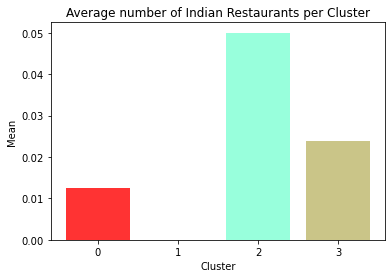

In [65]:
clusters_mean = [cluster0['Indian Restaurant'].mean(),cluster1['Indian Restaurant'].mean(),cluster2['Indian Restaurant'].mean(),
                 cluster3['Indian Restaurant'].mean()]
objects = (0,1,2,3)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','aquamarine', 'darkkhaki'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of Indian Restaurants per Cluster')

plt.show()

We can cleary see that **cluster 1 has least no. of Indian resturants and cluster 2 has the most**

Now we look at th neighborhoods inside cluster 1

In [66]:
print(pd.unique(cluster1['Neighborhood']))

['North Toronto West, Lawrence Park' 'Richmond, Adelaide, King'
 'Parkdale, Roncesvalles' 'Regent Park, Harbourfront'
 'University of Toronto, Harbord'
 'Toronto Dominion Centre, Design Exchange'
 "Queen's Park, Ontario Provincial Government" 'Runnymede, Swansea'
 'Studio District'
 'Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park'
 'The Beaches' 'St. James Town' 'Rosedale' 'Roselawn'
 'Kensington Market, Chinatown, Grange Park'
 'Dufferin, Dovercourt Village' 'First Canadian Place, Underground city'
 'Davisville North' 'Commerce Court, Victoria Hotel'
 'CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport'
 'Business reply mail Processing Centre, South Central Letter Processing Plant Toronto'
 'Christie' 'Brockton, Parkdale Village, Exhibition Place'
 'India Bazaar, The Beaches West' 'High Park, The Junction South'
 'Garden District, Ryerson' 'Little Portugal, Trinity'
 'Moore Park, Summerhill East' 'Lawrence Park

In [67]:
cluster1.head()

,Neighborhood,Indian Restaurant,Cluster Labels,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
21,"North Toronto West, Lawrence Park",0.0,1,43.715383,-79.405678,Tim Hortons,43.714894,-79.399776,Coffee Shop
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Poke Guys,43.654895,-79.385052,Poke Place
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Leña,43.651722,-79.379205,Latin American Restaurant
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Astarté Fresh Yogurt Bar,43.647596,-79.386419,Café
25,"Richmond, Adelaide, King",0.0,1,43.650571,-79.384568,Dineen @CommerceCourt,43.648251,-79.380127,Coffee Shop


## DISCUSSION

As we can see that the Cluster 1 has the most no. of Neighborhoods but has the least amount of Indian restaurants of any cluster of Toronto. This shows that there is a **potential market for opening a new Indian restaurants in Cluster 1** neighborhoods like Richmond, Studio District,Rosedale etc. Meanwhile the situation is quite the opposite on Cluster 2 which as the fewest no. of neighborhoods but the most no. of Indian Resturants. Cluster 0 and Cluster 3 both have average no. of neighborhoods and average no. of Indian restaurants hence they are well balanced.
In the end I will conclude that if I had to open a new Indian Restaurant in Toronto, I would have opened it in Cluster 2 neighborhood

## CONCLUSION

With this report we found out a potential region for opening a new Indian restaurant in Toronto with the help of various data science tools. The results of the report can be improved with more comprehensive analysis and with help of other better data sources in the future